In [89]:
## imports
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.tsa.ar_model
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt

In [10]:
## loading and reading in csv dataset using pandas
brazil_df = pd.read_csv('brazil_covid19_revised.csv')
brazil_df.head()

,date,region,state,cases,newCases,deaths
0,3/7/20,Centro-Oeste,Distrito Federal,1,1,0
1,3/8/20,Centro-Oeste,Distrito Federal,1,0,0
2,3/9/20,Centro-Oeste,Distrito Federal,1,0,0
3,3/10/20,Centro-Oeste,Distrito Federal,1,0,0
4,3/11/20,Centro-Oeste,Distrito Federal,2,1,0


In [11]:
brazil_df[brazil_df['date'] == '5/14/20']['cases'].sum()

202918

In [12]:
brazil_df['date'] = brazil_df['date'].replace('3/1/20','3/01/20')
brazil_df['date'] = brazil_df['date'].replace('3/2/20','3/02/20')
brazil_df['date'] = brazil_df['date'].replace('3/3/20','3/03/20')
brazil_df['date'] = brazil_df['date'].replace('3/4/20','3/04/20')
brazil_df['date'] = brazil_df['date'].replace('3/5/20','3/05/20')
brazil_df['date'] = brazil_df['date'].replace('3/6/20','3/06/20')
brazil_df['date'] = brazil_df['date'].replace('3/7/20','3/07/20')
brazil_df['date'] = brazil_df['date'].replace('3/8/20','3/08/20')
brazil_df['date'] = brazil_df['date'].replace('3/9/20','3/09/20')

brazil_df['date'] = brazil_df['date'].replace('4/1/20','4/01/20')
brazil_df['date'] = brazil_df['date'].replace('4/2/20','4/02/20')
brazil_df['date'] = brazil_df['date'].replace('4/3/20','4/03/20')
brazil_df['date'] = brazil_df['date'].replace('4/4/20','4/04/20')
brazil_df['date'] = brazil_df['date'].replace('4/5/20','4/05/20')
brazil_df['date'] = brazil_df['date'].replace('4/6/20','4/06/20')
brazil_df['date'] = brazil_df['date'].replace('4/7/20','4/07/20')
brazil_df['date'] = brazil_df['date'].replace('4/8/20','4/08/20')
brazil_df['date'] = brazil_df['date'].replace('4/9/20','4/09/20')

brazil_df['date'] = brazil_df['date'].replace('5/1/20','5/01/20')
brazil_df['date'] = brazil_df['date'].replace('5/2/20','5/02/20')
brazil_df['date'] = brazil_df['date'].replace('5/3/20','5/03/20')
brazil_df['date'] = brazil_df['date'].replace('5/4/20','5/04/20')
brazil_df['date'] = brazil_df['date'].replace('5/5/20','5/05/20')
brazil_df['date'] = brazil_df['date'].replace('5/6/20','5/06/20')
brazil_df['date'] = brazil_df['date'].replace('5/7/20','5/07/20')
brazil_df['date'] = brazil_df['date'].replace('5/8/20','5/08/20')
brazil_df['date'] = brazil_df['date'].replace('5/9/20','5/09/20')

In [13]:
brazil_df_sort = brazil_df.sort_values(by = 'date')

In [30]:
date_cases = {}
date_cases_keys = brazil_df_sort['date']
final_keys = []
for date in date_cases_keys:
    if date not in final_keys:
        final_keys.append(date)
date_cases_values = []

test_d = '2/24/20'

for d in date_cases_keys:
    if d != test_d:
        value = brazil_df_sort[brazil_df_sort['date'] == d]['cases'].sum()
        date_cases_values.append(value)
        test_d = d


In [59]:
date_cases = {final_keys[i]: date_cases_values[i] for i in range(len(final_keys))} 
date_case = pd.DataFrame.from_dict(date_cases, orient= 'index', columns = ['Cases'])

In [60]:
brazil_df_sort['date'] = pd.to_datetime(brazil_df_sort['date'])

In [178]:
dates_list = []
for date in brazil_df_sort['date']:
    if date not in dates_list:
        dates_list.append(date)
date_cases_2 = {dates_list[i]: date_cases_values[i] for i in range(len(dates_list))} 
date_case_2 = pd.DataFrame.from_dict(date_cases_2, orient= 'index', columns = ['Cases'])

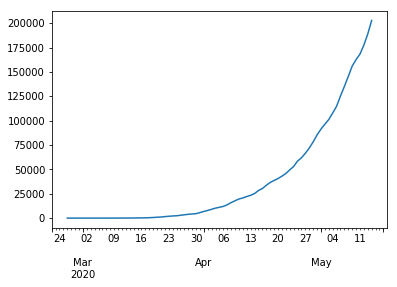

In [62]:
date_case_2['Cases'].plot()
plt.show()

In [80]:
## Determining rolling statistics - stationarety
rolmean = date_case_2.rolling(window= 12).mean()
rolstd = date_case_2.rolling(window=12).std()

print(rolmean, rolstd)

                    Cases
2020-02-26            NaN
2020-02-27            NaN
2020-02-28            NaN
2020-02-29            NaN
2020-03-01            NaN
2020-03-02            NaN
2020-03-03            NaN
2020-03-04            NaN
2020-03-05            NaN
2020-03-06            NaN
2020-03-07            NaN
2020-03-08       6.500000
2020-03-09       8.500000
2020-03-10      11.250000
2020-03-11      15.500000
2020-03-12      21.750000
2020-03-13      29.750000
2020-03-14      39.666667
2020-03-15      56.166667
2020-03-16      75.416667
2020-03-17      99.083333
2020-03-18     133.666667
2020-03-19     183.833333
2020-03-20     257.083333
2020-03-21     349.000000
2020-03-22     475.000000
2020-03-23     628.250000
2020-03-24     805.250000
2020-03-25     999.833333
2020-03-26    1232.666667
...                   ...
2020-04-15   18375.916667
2020-04-16   20054.833333
2020-04-17   21934.166667
2020-04-18   23979.416667
2020-04-19   26057.500000
2020-04-20   28112.000000
2020-04-21  

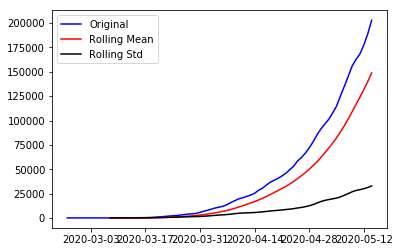

In [82]:
## plot rolling statistics
orig = plt.plot(date_case_2, color = 'blue', label= "Original")
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = "Rolling Std")
plt.legend(loc = 'best')
plt.show(block = False)
## mean and std not constant - so not stationary

In [87]:
## Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test")
test = adfuller(date_case_2['Cases'], autolag = "AIC")

output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
    
print(output)

##cannot reject null hypothesis - not stationary

Results of Dickey-Fuller Test
Test Statistic                  1.425208
p-value                         0.997226
#Lags Used                      7.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


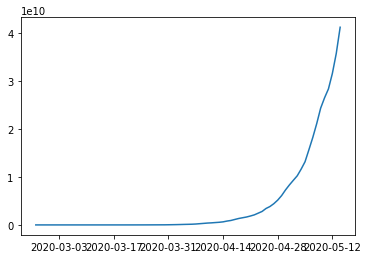

In [181]:
## Estimating trend
date_case_2_square = np.square(date_case_2)
plt.plot(date_case_2_square)

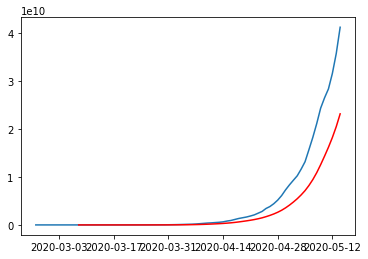

In [182]:
## calculating moving average
movingAverage = date_case_2_square.rolling(window=12).mean()
movingStd = date_case_2_square.rolling(window=12).std()
plt.plot(date_case_2_square)
plt.plot(movingAverage, color = 'red')

In [183]:
## diff between moving average and actual # of cases
minusMovAvg = date_case_2_square - movingAverage
minusMovAvg.head(12)

##remove null values
minusMovAvg.dropna(inplace = True)
minusMovAvg.head(10)

##these transformations works to make the time series stationary

,Cases
2020-03-08,522.333333
2020-03-09,470.333333
2020-03-10,905.083333
2020-03-11,2227.833333
2020-03-12,4959.083333
2020-03-13,7834.083333
2020-03-14,11651.333333
2020-03-15,33677.333333
2020-03-16,43871.083333
2020-03-17,66743.416667


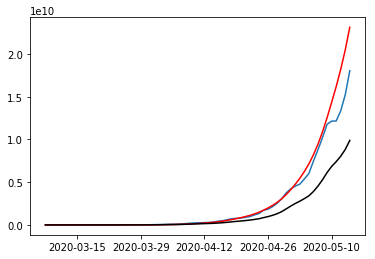

In [184]:
plt.plot(minusMovAvg)
plt.plot(movingAverage, color = 'red', label = 'RollingMean')
plt.plot(movingStd, color = 'black', label = 'RollingStd')
plt.show()

In [185]:
## reperform Dicky-Fuller Test on transformed data
print("Results of Dickey-Fuller Test")
test = adfuller(date_case_2_square['Cases'], autolag = "AIC")

output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
    
print(output)

##p-value is much lower now and test statistic closer to critical value

Results of Dickey-Fuller Test
Test Statistic                 -1.764067
p-value                         0.398442
#Lags Used                     11.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [186]:
def test_stationarity(data):
    movingAverage = data.rolling(window=12).mean()
    movingStd = data.rolling(window=12).std()
    plt.plot(data)
    plt.plot(movingAverage, color = 'red')
    plt.plot(movingStd, color = 'black')
    
    print("Results of Dickey-Fuller Test")
    test = adfuller(data['Cases'], autolag = "AIC")

    output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for k,v in test[4].items():
        output['Critical Value (%s)'%k] = v
    
    print(output)

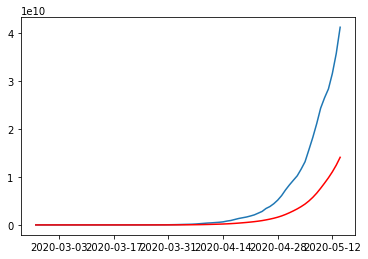

In [187]:
##calculate weighted average
weight_avg = date_case_2_square.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(date_case_2_square)
plt.plot(weight_avg, color = 'red')

Results of Dickey-Fuller Test
Test Statistic                 -1.764067
p-value                         0.398442
#Lags Used                     11.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


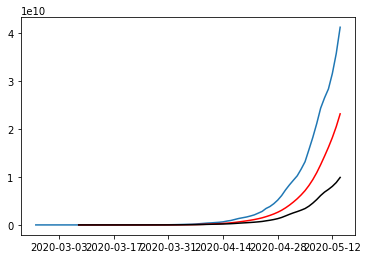

In [188]:
test_stationarity(date_case_2_square)

In [197]:
X = date_case_2_square.dropna()
train = X[1: len(X) - 9]
test = X[len(X) - 9:]

In [198]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score

#train autoregression model
model = AR(train)
model_fitted = model.fit()
print('the lag value is: %s' % model_fitted.k_ar)

the lag value is: 11


/Users/anyaaggarwal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [208]:
## predict
predict = model_fitted.predict(start = len(train), end = len(train) + len(test) - 1, dynamic = False)
print(predict)

2020-05-06    1.543465e+10
2020-05-07    1.783256e+10
2020-05-08    2.060864e+10
2020-05-09    2.385657e+10
2020-05-10    2.771734e+10
2020-05-11    3.253471e+10
2020-05-12    3.799333e+10
2020-05-13    4.395817e+10
2020-05-14    4.987294e+10
Freq: D, dtype: float64


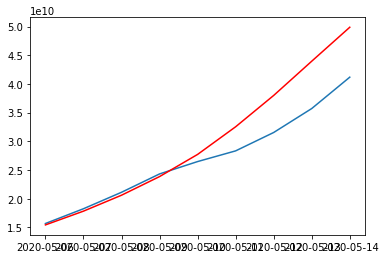

In [212]:
plt.plot(date_case_2_square['Cases'].tail(9))
plt.plot(predict, color = 'red')

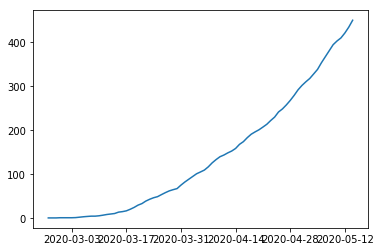

In [231]:
date_case_2_sqrt = np.sqrt(date_case_2)
plt.plot(date_case_2_sqrt)

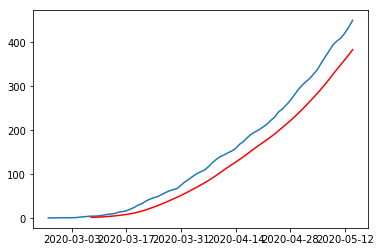

In [232]:
movingAverage2 = date_case_2_sqrt.rolling(window=12).mean()
movingStd2 = date_case_2_sqrt.rolling(window=12).std()
plt.plot(date_case_2_sqrt)
plt.plot(movingAverage2, color = 'red')

In [233]:
minusMovAvg2 = date_case_2_sqrt - movingAverage2
minusMovAvg2.head(12)

##remove null values
minusMovAvg2.dropna(inplace = True)
minusMovAvg2.head(10)

,Cases
2020-03-08,2.833408
2020-03-09,2.500074
2020-03-10,2.928447
2020-03-11,3.791006
2020-03-12,4.741472
2020-03-13,5.158896
2020-03-14,5.460585
2020-03-15,7.542060
2020-03-16,7.566566
2020-03-17,8.127149


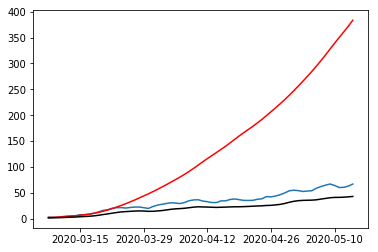

In [234]:
plt.plot(minusMovAvg2)
plt.plot(movingAverage2, color = 'red', label = 'RollingMean')
plt.plot(movingStd2, color = 'black', label = 'RollingStd')
plt.show()

In [235]:
print("Results of Dickey-Fuller Test")
test = adfuller(date_case_2_sqrt['Cases'], autolag = "AIC")

output = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
    
print(output)

Results of Dickey-Fuller Test
Test Statistic                  4.616363
p-value                         1.000000
#Lags Used                      3.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


Results of Dickey-Fuller Test
Test Statistic                  4.616363
p-value                         1.000000
#Lags Used                      3.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


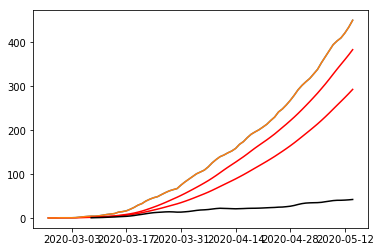

In [236]:
weight_avg2 = date_case_2_sqrt.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(date_case_2_sqrt)
plt.plot(weight_avg2, color = 'red')
test_stationarity(date_case_2_sqrt)

In [237]:
X_sqrt = date_case_2_sqrt.dropna()
train_sq = X_sqrt[1: len(X_sqrt) - 9]
test_sq = X_sqrt[len(X_sqrt) - 9:]

In [238]:
model_sqrt = AR(train_sq)
model_fitted_sqrt = model_sqrt.fit()
print('the lag value is: %s' % model_fitted_sqrt.k_ar)

the lag value is: 11


/Users/anyaaggarwal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2020-05-06    350.472125
2020-05-07    362.779046
2020-05-08    374.769086
2020-05-09    385.966421
2020-05-10    396.866027
2020-05-11    408.669007
2020-05-12    421.395536
2020-05-13    434.657847
2020-05-14    448.482629
Freq: D, dtype: float64


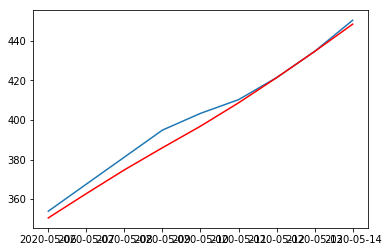

In [239]:
predict_sqrt = model_fitted_sqrt.predict(start = len(train_sq), end = len(train_sq) + len(test_sq) - 1, dynamic = False)
print(predict_sqrt)

plt.plot(date_case_2_sqrt['Cases'].tail(9))
plt.plot(predict_sqrt, color = 'red')

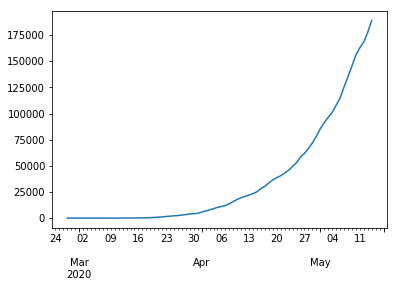

In [124]:
##differencing 
date_case_2['CasesDiff'] = date_case_2['Cases'] = date_case_2['Cases'].shift(1)
date_case_2['CasesDiff'].dropna().plot()